In [177]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

In [178]:
sephoranew = pd.read_csv('sephoranew.csv')
sephoranew.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,0,exclusive.1,online only,exclusive ·online only,limited edition ·exclusive,limited edition,limited edition · online only,limited edition ·exclusive ·online only,limited time offer,limited time offer ·limited edition · exclusive
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [179]:
sephoranew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               9168 non-null   int64  
 1   brand                                            9168 non-null   object 
 2   category                                         9168 non-null   object 
 3   name                                             9168 non-null   object 
 4   size                                             9168 non-null   object 
 5   rating                                           9168 non-null   float64
 6   number_of_reviews                                9168 non-null   int64  
 7   love                                             9168 non-null   int64  
 8   price                                            9168 non-null   float64
 9   value_price                   

# ORDINAL ENCODER

In [180]:
encoder = OrdinalEncoder()
sephoranew[['brand', 'category', 'name', 'size', 'URL', 'options', 'details', 'how_to_use', 'ingredients']] = encoder.fit_transform(sephoranew[['brand', 'category', 'name', 'size', 'URL', 'options', 'details', 'how_to_use', 'ingredients']])

# menampilkan hasil encoder
sephoranew[['brand', 'category', 'name', 'size', 'URL', 'options', 'details', 'how_to_use', 'ingredients']]

,brand,category,name,size,URL,options,details,how_to_use,ingredients
0,4.0,71.0,1079.0,1324.0,1028.0,563.0,1493.0,3392.0,4469.0
1,4.0,28.0,1920.0,644.0,1860.0,65.0,90.0,6495.0,6878.0
2,4.0,119.0,586.0,1306.0,1019.0,398.0,932.0,6495.0,4165.0
3,4.0,119.0,5252.0,1032.0,1029.0,157.0,1377.0,6495.0,6878.0
4,4.0,71.0,1927.0,1324.0,1867.0,563.0,1435.0,3392.0,4666.0
...,...,...,...,...,...,...,...,...,...
9163,232.0,55.0,8187.0,1621.0,8246.0,563.0,4830.0,5118.0,3577.0
9164,232.0,99.0,3407.0,1114.0,7123.0,563.0,5607.0,1742.0,4667.0
9165,232.0,137.0,8889.0,674.0,7186.0,563.0,6169.0,5623.0,4384.0
9166,232.0,142.0,3375.0,1621.0,3347.0,563.0,6669.0,6495.0,6878.0


# DATA SPLIT

In [181]:
sephoranew.drop(columns='id', inplace=True)

X = sephoranew.drop(columns = 'price')
y = sephoranew ['price']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=42)

In [182]:
print("Shape of the X Train :", X_train.shape)

Shape of the X Train : (7334, 28)


# SUPERVISED LEARNING

## LINEAR REGRESSION

In [183]:
X = sephoranew[['value_price', 'online_only']]
y = sephoranew['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [184]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [185]:
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 3.1206223485936366
MSE : 88.30938526753502
RMSE : 9.3973073413364
R-Squared : 0.9560133402612286


## VISUALISASI

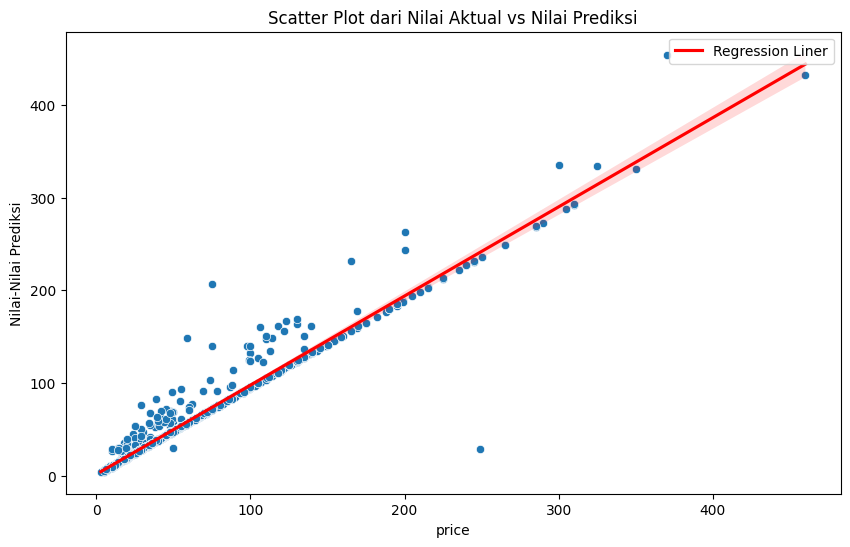

In [186]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Scatter Plot dari Nilai Aktual vs Nilai Prediksi")
plt.xlabel("Nilai-Nilai Aktual")
plt.ylabel("Nilai-Nilai Prediksi")

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', label='Regression Liner')
plt.legend()
plt.show()

Visualisasi di atas merupakan scatter plot dimana sumbu x mewakili y_test (nilai aktual) dan sumbu y mewakili y_pred (nilai prediksi) dengan setiap titik plot mewakili nilai x dan y. 

Dari visualisasi di atas dapat disimpulkan bahwa model hampir sempurna karena mendekati garis regresi yang berwarna merah. Jika jauh dari garis maka model memiliki kesalahan dalam prediksi. 

# UNSUPERVISED LEARNING

## K-Means

In [187]:
kmeans = pd.read_csv('sephoranew.csv')
X = kmeans[['value_price', 'price']]
X

,value_price,price
0,75,66.0
1,66,66.0
2,30,180.0
3,120,120.0
4,80,72.0
...,...,...
9163,6,6.0
9164,27,15.0
9165,30,16.0
9166,50,50.0


In [188]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)

e:\KULIAH\Praktikum\SEM 3\PRAKTIKUM KECERDASAN BUATAN\Praktek\Aprisa_001\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [189]:
data = X.copy()
data['label_cluster'] = kmeans_model.labels_
data

,value_price,price,label_cluster
0,75,66.0,1
1,66,66.0,1
2,30,180.0,1
3,120,120.0,1
4,80,72.0,1
...,...,...,...
9163,6,6.0,0
9164,27,15.0,0
9165,30,16.0,0
9166,50,50.0,0


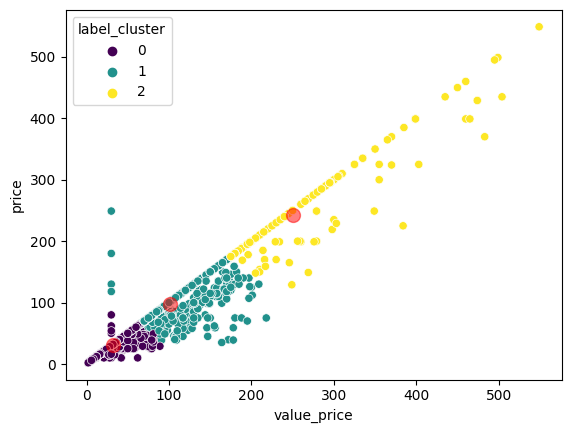

In [196]:
centroids = kmeans_model.cluster_centers_
sns.scatterplot(data=_, x='value_price', y='price', hue='label_cluster', palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,
label='Centroids')

Visualisasi k-means dengan sumbu X sebagai 'value_price' dan sumbu Y sebagai 'price'. Dalam plot ini, data ditampilkan dengan variasi warna yang menggambarkan cluster-cluster yang dihasilkan oleh algoritma K-Means. Di samping itu, titik-titik pusat cluster ditampilkan sebagai titik merah di tengah-tengah masing-masing cluster. Ini membantu kita untuk secara visual mengidentifikasi lokasi dan persebaran data dalam setiap cluster.

## Tanpa label

In [191]:
ss_score = silhouette_score(X, kmeans_model.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans_model.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans_model.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.68
Davies-Bouldin Index: 0.51
Calinski-Harabasz Index: 19302.69


## Dengan Label

In [192]:
cross_tab = pd.crosstab (data['label_cluster'], data["price"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(X["price"], kmeans_model.labels_)
print("\n")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

true_labels_num = X["price"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans_model.labels_)
print("\n")
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

homogeneity = homogeneity_score(X["price"], kmeans_model.labels_)
completeness = completeness_score(X["price"], kmeans_model.labels_)
v_measure = v_measure_score(X["price"], kmeans_model.labels_)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
price          2.00    3.00    3.50    3.95    4.00    4.90    4.95    4.99    \
label_cluster                                                                   
0                   2       8       1       1       3       1       1       1   
1                   0       0       0       0       0       0       0       0   
2                   0       0       0       0       0       0       0       0   

price          5.00    5.30    ...  370.00  385.00  399.00  429.00  435.00  \
label_cluster                  ...                                           
0                  21       1  ...       0       0       0       0       0   
1                   0       0  ...       0       0       0       0       0   
2                   0       0  ...       2       1       5       2       2   

price          450.00  460.00  495.00  499.00  549.00  
label_cluster                                          
0                   0       0       0       0       0  
1                

e:\KULIAH\Praktikum\SEM 3\PRAKTIKUM KECERDASAN BUATAN\Praktek\Aprisa_001\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)




Adjusted Rand Index (ARI): 0.02


Normalized Mutual Information (NMI): 0.22


e:\KULIAH\Praktikum\SEM 3\PRAKTIKUM KECERDASAN BUATAN\Praktek\Aprisa_001\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\KULIAH\Praktikum\SEM 3\PRAKTIKUM KECERDASAN BUATAN\Praktek\Aprisa_001\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\KULIAH\Praktikum\SEM 3\PRAKTIKUM KECERDASAN BUATAN\Praktek\Aprisa_001\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Homogeneity Score: 0.13
Completeness Score: 0.95
V-Measure Score: 0.22


## VISUALISASI

ValueError: Could not interpret value `label_cluster` for parameter `hue`

e:\KULIAH\Praktikum\SEM 3\PRAKTIKUM KECERDASAN BUATAN\Praktek\Aprisa_001\lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


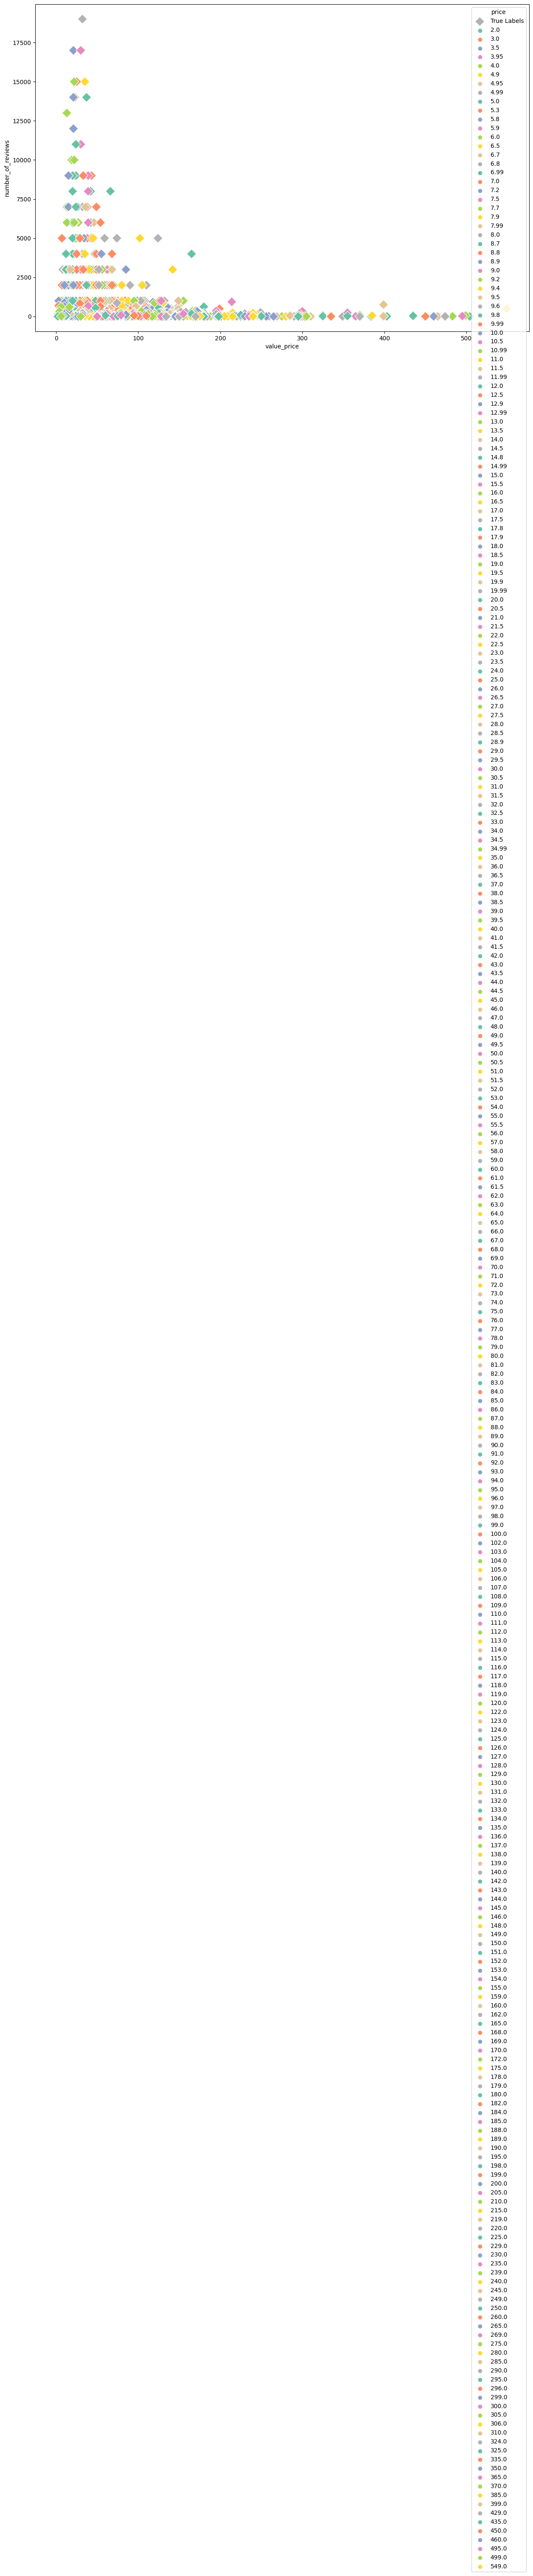

In [204]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=sephoranew, x="value_price", y="number_of_reviews", hue="price", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=sephoranew, x="value_price", y="number_of_reviews", hue="label_cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Value_price")
plt.ylabel("number_of_reviews")
plt.legend(title="Legend", loc="upper right")
plt.show()